## 文本分类的延伸和发展

下面使用函数化的代码，实现相关的整体 report 的输出，即搭建一个比较全面的模板

请注意，输出的结果放在了Results文件夹里面，该文件夹里放置每一份的实验的结果相关报告以及生成的PCA降维图片

F:\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['傥', '兼', '前', '唷', '啪', '啷', '喔', '天', '始', '漫', '然', '特', '竟', '莫', '见', '设', '说', '达', '非'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


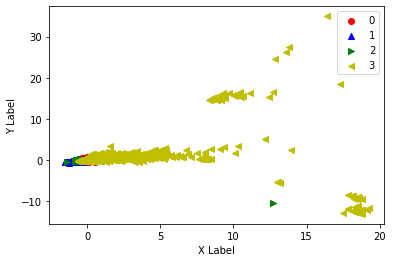

In [4]:
import pandas as pd
import numpy as np
import os
os.system('pip install jieba')
import jieba
import time
import itertools
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score,train_test_split

def tokenizer(s):
    words=[]
    cut = jieba.cut(s)
    for word in cut:
        words.append(word)
    return words

def file_mining(input_file, output_file, fig_file):
    '''
    :param input_file:  SpiltData/allDataRandom_i.csv
    :param output_file:  DataReport_i.log
    :return None:
    '''
    df_post = pd.read_csv(input_file,encoding="utf-8")
    df_post=df_post.dropna(axis=0, subset= ["微博内容"])
    df_post.reset_index(drop=True,inplace=True)
    # drop=True：删除原行索引；inplace=True:在数据上进行更新
    stopwords = []
    for word in open('stopwords/cn_stopwords.txt','r',encoding='utf-8'):
        stopwords.append(word.strip())
    count = CountVectorizer(tokenizer=tokenizer, stop_words=list(stopwords))
    countvector = count.fit_transform(df_post['微博内容']).toarray()
    flog = open(output_file,'w+',encoding='utf-8')
    flog.write('打印词频矩阵 countvector ......\n'+ str(countvector))
    flog.write('\n词频矩阵的形状： '+ str(countvector.shape))  #打印看看生成的词频矩阵相关参数

    kind = np.unique(df_post['类标签'].values)
    flog.write('\n显示总标签名称：'+ str(kind))
    pca = PCA(n_components=4)
    newvector = pca.fit_transform(countvector)
    plt.figure()
    for i,c,m in zip(range(len(kind)),['r','b','g','y'],['o','^','>','<']):
        index = df_post[df_post['类标签']==kind[i]].index
        x = newvector[index,0]
        y = newvector[index,1]
        plt.scatter(x,y,c=c,marker=m,label=kind[i])
    plt.legend()
    plt.xlabel('X Label')
    plt.ylabel('Y Label')
    plt.savefig(fig_file,dpi=600)

    y = df_post['类标签']
    # print(y)
    #X为去掉标签列的数据
    X = countvector
    # print(X)
    flog.write("\nX.shape countvector词频矩阵的形状"+ str(X.shape))
    flog.write("\ny.shape 相关类标签的形状"+ str(y.shape))

    train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size=0.2)
    flog.write("\ntrain_data.shape 训练集矩阵shape：\n"+ str(train_data.shape))
    flog.write("\ntest_data.shape 测试集矩阵shape：\n" + str(test_data.shape))
    flog.write("\ntrain_labels.shape 训练集标签矩阵shape：\n" + str(train_labels.shape))
    flog.write("\ntest_labels.shape 测试集标签矩阵shape：\n" + str(test_labels.shape))

    start =  time.perf_counter()
    kNN_classifier = KNeighborsClassifier(n_neighbors=5)#初始化k近邻算法对象
    kNN_classifier.fit(train_data,train_labels)#对训练集进行训练
    label_predict = kNN_classifier.predict(test_data)#对测试集进行预测
    end =time.perf_counter()
    flog.write("\nknn程序运行时间为："+ str(end-start)+ "s")
    flog.write("\nGenerating reports......")
    """预测结果"""
    flog.write("\nPredict_rlt:\n"+ str(label_predict))
    """预测准确个数"""
    flog.write("\nCorrect_no:"+ str(sum(label_predict==test_labels)))
    """预测准确率"""
    flog.write("\nAccuracy:"+ str(sum(label_predict==test_labels)/len(test_labels)))

    from sklearn.metrics import classification_report # 结果预测评估模块
    flog.write('\n生成的报告相关内容：\n')
    flog.write(classification_report(test_labels, label_predict))

    from sklearn.tree import DecisionTreeClassifier # 决策树分类器
    start = time.perf_counter()
    dtree = DecisionTreeClassifier()
    dtree.fit(train_data,train_labels)#对训练集进行训练
    label_predict = dtree.predict(test_data)#对测试集进行预测
    end =time.perf_counter()
    flog.write("\n决策树程序运行时间为："+ str(end-start)+" s")
    flog.write("\nGenerating reports......")
    """预测结果"""
    flog.write("\nPredict_rlt:\n"+str(label_predict))
    """预测准确个数"""
    flog.write("\nCorrect_no:"+ str(sum(label_predict==test_labels)))
    """预测准确率"""
    flog.write("\nAccuracy:"+ str(sum(label_predict==test_labels)/len(test_labels)))

    # from sklearn.metrics import classification_report # 结果预测评估模块
    flog.write('\n生成的报告相关内容：\n')
    flog.write(classification_report(test_labels, label_predict))

    from sklearn.naive_bayes import GaussianNB
    # 对高斯模型交叉验证
    start = time.perf_counter()
    gNB = GaussianNB()
    gNB.fit(train_data,train_labels)#对训练集进行训练
    label_predict = gNB.predict(test_data)#对测试集进行预测
    end =time.perf_counter()
    flog.write("\n高斯朴素贝叶斯模型程序运行时间为："+ str(end-start)+"s")
    flog.write("\nGenerating reports......")
    """预测结果"""
    flog.write("\nPredict_rlt:\n"+ str(label_predict))
    """预测准确个数"""
    flog.write("\nCorrect_no:"+ str(sum(label_predict==test_labels)))
    """预测准确率"""
    flog.write("\nAccuracy:"+ str(sum(label_predict==test_labels)/len(test_labels)))

    # from sklearn.metrics import classification_report # 结果预测评估模块
    flog.write('\n生成的报告相关内容：\n')
    flog.write(classification_report(test_labels, label_predict))

    from sklearn.naive_bayes import BernoulliNB
    start = time.perf_counter()
    gNB = BernoulliNB()
    gNB.fit(train_data,train_labels)#对训练集进行训练
    label_predict = gNB.predict(test_data)#对测试集进行预测
    end =time.perf_counter()
    flog.write("\n多元伯努利朴素贝叶斯模型程序运行时间为："+ str(end-start)+"s")
    flog.write("\nGenerating reports......")
    """预测结果"""
    flog.write("\nPredict_rlt:\n"+ str(label_predict))
    """预测准确个数"""
    flog.write("\nCorrect_no:"+ str(sum(label_predict==test_labels)))
    """预测准确率"""
    flog.write("\nAccuracy:"+ str(sum(label_predict==test_labels)/len(test_labels)))

    # from sklearn.metrics import classification_report # 结果预测评估模块
    flog.write('\n生成的报告相关内容：\n')
    flog.write(classification_report(test_labels, label_predict))

#     from sklearn import svm
#     start = time.perf_counter()
#     clf = svm.SVC(C=0.8, kernel='rbf', gamma=20, decision_function_shape='ovr')
#     ## 测试的同学自己改一下数据看看效果
#     flog.write('\nStart training SVM')
#     clf = clf.fit(train_data,train_labels)#对训练集进行训练
#     label_predict = clf.predict(test_data)#对测试集进行预测
#     end =time.perf_counter()
#     flog.write("\nSVM支持向量机程序运行时间为："+ str(end-start)+" s")
#     """预测结果"""
#     flog.write("\nPredict_rlt:\n"+ str(label_predict))
#     """预测准确个数"""
#     flog.write("\nCorrect_no:"+ str(sum(label_predict==test_labels)))
#     """预测准确率"""
#     flog.write("\nAccuracy:"+ str(sum(label_predict==test_labels)/len(test_labels)))

#     # from sklearn.metrics import classification_report # 结果预测评估模块
#     flog.write('\n生成的报告相关内容：\n')
#     flog.write(classification_report(test_labels, label_predict))
    flog.close()
file_mining('SpiltData/allDataRandom_2.csv','Results/report-csv-2.log','Results/report-csv-PCA2.png')
for i in range(1,10,1):
    file_mining('SpiltData/allDataRandom_'+str(i)+'.csv', 'Results/report-csv-'+str(i)+'.log', 'Results/report-csv-PCA'+str(i)+'.png')